
Training CNN-1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training CNN-2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training CNN-3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

=== Extended CNN Experiment Results ===

   Model          Layers  Learning Rate  Validation Accuracy  \
0  CNN-1   [128, 64, 32]         0.0010               0.9765   
1  CNN-2  [256, 128, 64]         0.0010               0.9695   
2  CNN-3   [128, 64, 32]         0.0001               0.9560   

   Training Time (s)  
0          54.235707  
1          55.973185  
2          43.584867  


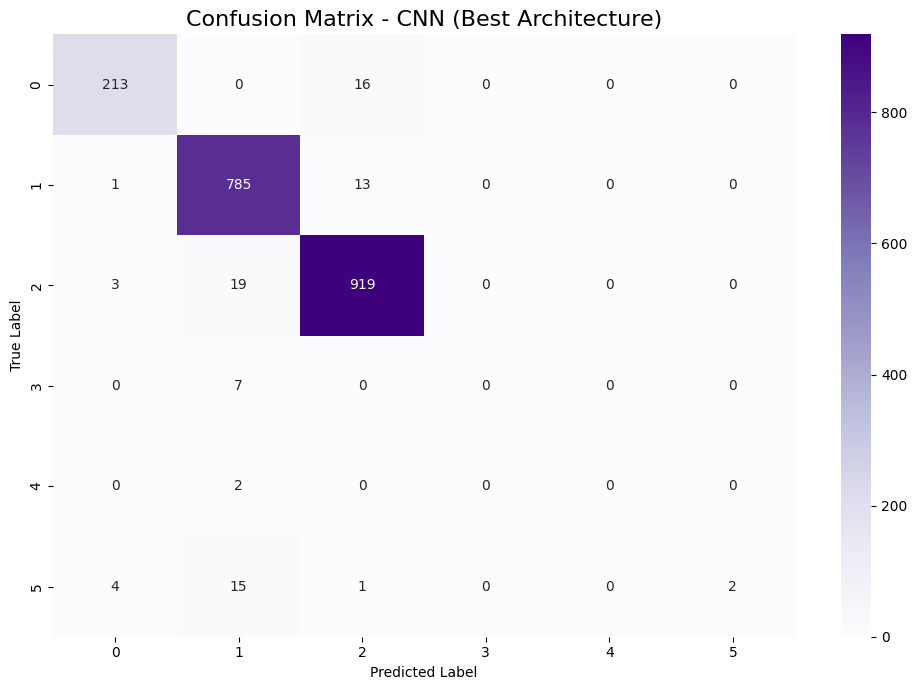

In [12]:

# Import necessary libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Step 1: Load Data
file_path = '/content/loan-10k.lrn.csv'  # Dataset path
loan_data = pd.read_csv(file_path)

# Step 2: Preprocessing
# Drop ID column
loan_data_clean = loan_data.drop(columns=['ID'])

# Identify features and target
target_column = 'loan_status'
X = loan_data_clean.drop(columns=[target_column])
y = loan_data_clean[target_column]

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Encode labels for TensorFlow
le_cnn = LabelEncoder()
y_train_cnn = le_cnn.fit_transform(y_train)
y_val_cnn = le_cnn.transform(y_val)
num_classes = len(np.unique(y_train_cnn))

# Step 3: Define CNN Models and Settings
cnn_experiments = [
    {"name": "CNN-1", "layers": [128, 64, 32], "learning_rate": 0.001},
    {"name": "CNN-2", "layers": [256, 128, 64], "learning_rate": 0.001},
    {"name": "CNN-3", "layers": [128, 64, 32], "learning_rate": 0.0001},
]

# Step 4: Train and Evaluate CNNs
cnn_results = []

for exp in cnn_experiments:
    print(f"\nTraining {exp['name']}...")

    # Build the CNN model
    cnn_model = Sequential()
    cnn_model.add(Dense(exp["layers"][0], activation='relu', input_shape=(X_train.shape[1],)))
    cnn_model.add(BatchNormalization())
    cnn_model.add(Dropout(0.3))
    for neurons in exp["layers"][1:]:
        cnn_model.add(Dense(neurons, activation='relu'))
        cnn_model.add(BatchNormalization())
        cnn_model.add(Dropout(0.3))
    cnn_model.add(Dense(num_classes, activation='softmax'))  # Output layer

    # Compile the model
    cnn_model.compile(
        optimizer=Adam(learning_rate=exp["learning_rate"]),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    start_time = time.time()
    history = cnn_model.fit(
        X_train, y_train_cnn,
        validation_data=(X_val, y_val_cnn),
        epochs=30,
        batch_size=32,
        verbose=0
    )
    training_time = time.time() - start_time

    # Evaluate on validation set
    y_pred_probs = cnn_model.predict(X_val)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    val_accuracy = accuracy_score(y_val_cnn, y_pred_classes)

    # Save results
    cnn_results.append({
        "Model": exp["name"],
        "Layers": exp["layers"],
        "Learning Rate": exp["learning_rate"],
        "Validation Accuracy": val_accuracy,
        "Training Time (s)": training_time
    })

# Step 5: Summarize Results
cnn_results_df = pd.DataFrame(cnn_results)

# Display the summary
print("\n=== Extended CNN Experiment Results ===\n")
print(cnn_results_df)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - CNN (Best Architecture)', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



